In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filePath = "./res/En_In.xls"
filePathCsv = "./res/gpd.csv"
filePathToScimajor = "./res/scimagojr.xlsx"

pd.set_option('display.float_format', '{:,.0f}'.format)

df = pd.read_excel(filePath)
df = df.iloc[1:-1, 2:]
df.columns = ["Country", "Energy Supply", "Energy Supply per Capita", "% Renewable"]

df['Energy Supply per Capita'] = pd.to_numeric(df['Energy Supply per Capita'], errors='coerce')
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce') * 1000000

country_mapping = {
    "Republic of Korea": "South Korea",
    "United States of America20": "United States",
    "United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

df['Country'] = df['Country'].replace(country_mapping)
df['Country'] = df['Country'].str.replace(r'\s*\(.*?\)', '', regex=True)  
df['Country'] = df['Country'].str.replace(r'\d+', '', regex=True)  

# df.head(10)

df.loc[df["Country"].isin(["United States", "American Samoa", "South Korea", "Bolivia"])]

Country  Energy Supply  Energy Supply per Capita % Renewable
20   American Samoa            NaN                       NaN           1
41          Bolivia    336,000,000                        32          31
181     South Korea 11,007,000,000                       221           2
233   United States 90,838,000,000                       286          12

In [490]:
csv = pd.read_csv(filePathCsv, skiprows=4)

country_mapping = {
    "Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran", 
    "Hong Kong SAR, China": "Hong Kong"
}
csv['Country Name'] = csv['Country Name'].replace(country_mapping)

csv.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  GDP at market prices (constant 2010 US$)   
1      Andorra          AND  GDP at market prices (constant 2010 US$)   
2  Afghanistan          AFG  GDP at market prices (constant 2010 US$)   
3       Angola          AGO  GDP at market prices (constant 2010 US$)   
4      Albania          ALB  GDP at market prices (constant 2010 US$)   

   Indicator Code  1960  1961  1962  1963  1964  1965  ...           2006  \
0  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ...            NaN   
1  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ...  4,018,195,654   
2  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ... 10,305,228,125   
3  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ... 55,811,028,115   
4  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN  ...  9,771,760,095   

            2007           2008           2009           2010           2011  \
0            NaN            NaN            NaN  2,467,703,911            NaN   
1  4,021,331,428  3,675,727,911  3,535,389,133  3,346,317,329  3,185,604,582   
2 11,721,187,594 12,144,482,858 14,697,331,941 15,936,800,636 16,911,126,453   
3 68,420,444,001 77,874,196,512 79,753,199,398 82,470,913,121 85,702,615,836   
4 10,348,293,942 11,127,520,474 11,500,292,411 11,926,953,259 12,231,090,568   

            2012           2013            2014            2015  
0            NaN            NaN             NaN             NaN  
1  3,129,537,612  3,127,549,908             NaN             NaN  
2 19,352,203,806 19,731,337,261  19,990,317,161  20,294,152,243  
3 90,120,963,241 96,261,432,368 100,886,286,611 103,910,558,934  
4 12,404,772,054 12,542,465,022  12,793,314,323  13,120,823,169  

[5 rows x 60 columns]

In [491]:
sci = pd.read_excel(filePathToScimajor)
sci = sci.set_index("Country")

df.set_index('Country', inplace=True)
csv.rename(columns={ csv.columns[0]: "Country" }, inplace = True)
csv_last_10_years = csv.set_index('Country').iloc[:, -10:]

res = df_combined = sci.join(df, how='inner').join(csv_last_10_years, how='inner')
first15 = res.head(15)
first15

Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       8896               8819      57470   
Australia             14       8831               8725      90765   
Brazil                15       8668               8596      60702   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                       5      138   
United States               265436                       8      230   
Japan                        61554                       7      134   
United Kingdom               37874                      10      139   
Russian Federation           12422                       2       57   
Canada                       40930                      12      149   
Germany                      27426                       8      126   
India                        37209                       9      115   
France                       28601                      10      114   
South Korea                  22595                      10      104   
Italy                        26661                      10      106   
Spain                        23964                      13      115   
Iran                         19125                       6       72   
Australia                    15606                      10      107   
Brazil                       14396                       7       86   

                     Energy Supply  Energy Supply per Capita % Renewable  \
Country                                                                    
China              127,191,000,000                        93          20   
United States       90,838,000,000                       286          12   
Japan               18,984,000,000                       149          10   
United Kingdom       7,920,000,000                       124          11   
Russian Federation  30,709,000,000                       214          17   
Canada              10,431,000,000                       296          62   
Germany             13,261,000,000                       165          18   
India               33,195,000,000                        26          15   
France              10,597,000,000                       166          17   
South Korea         11,007,000,000                       221           2   
Italy                6,530,000,000                       109          34   
Spain                4,923,000,000                       106          38   
Iran                 9,172,000,000                       119           6   
Australia            5,386,000,000                       231          12   
Brazil              12,149,000,000                        59          70   

                                 2006               2007               2008  \
Country                                                                       
China               3,992,331,462,571  4,559,041,383,518  4,997,775,145,606   
United States      14,792,303,791,800 15,055,395,304,800 15,011,490,541,400   
Japan               5,496,541

In [492]:
def average_gdp(source):
    years = source.iloc[:, 10:]
    return years.mean(axis=1).sort_values(ascending=False)  

In [493]:
average = average_gdp(first15)
average

Country
United States        15,364,344,302,990
China                 6,348,608,932,836
Japan                 5,542,207,638,235
Germany               3,493,025,339,073
France                2,681,724,635,762
United Kingdom        2,487,906,661,418
Brazil                2,189,794,143,775
Italy                 2,120,175,089,934
India                 1,769,297,396,604
Canada                1,660,647,466,308
Russian Federation    1,565,459,478,481
Spain                 1,418,078,278,146
Australia             1,164,042,729,991
South Korea           1,106,714,508,245
Iran                    444,155,754,051
dtype: float64

In [494]:
def gdp_change_for_5th_country(source):
    country_5th = source.index[4]  
    gdp_change = res.loc[country_5th, '2015'] - res.loc[country_5th, '2006']
    
    return (country_5th, gdp_change)

In [495]:
gdp_change_for_5th_country(average)

('France', 153345695364.24023)

In [496]:
def max_renewable_energy(data):
    max_renewable = data['% Renewable'].idxmax()  
    max_value = data.loc[max_renewable, '% Renewable'] 
    
    return max_renewable, max_value

In [497]:
max_renewable_energy(first15)

('Brazil', 69.64803)

In [498]:
def population_estimate(data):
    data['Estimated Population'] = data['Energy Supply'] / data['Energy Supply per Capita']
    sorted_data = data['Estimated Population'].sort_values(ascending=False)
    sixth_country = sorted_data.index[5]
    sixth_population = sorted_data.iloc[5]
    
    return sixth_country, sixth_population

In [499]:
population_estimate(first15)

C:\Users\Lozov\AppData\Local\Temp\ipykernel_7292\2630629621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Estimated Population'] = data['Energy Supply'] / data['Energy Supply per Capita']


('Japan', 127409395.97315437)

In [500]:
def citation_energy_correlation(data):
    data['Citable documents per Capita'] = data['Citable documents'] / data['Estimated Population']
    correlation = data['Citable documents per Capita'].corr(data['Energy Supply per Capita'])
    
    return correlation

In [501]:
citation_energy_correlation(first15)

C:\Users\Lozov\AppData\Local\Temp\ipykernel_7292\3930602975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Citable documents per Capita'] = data['Citable documents'] / data['Estimated Population']


0.7940010435442946

In [502]:
def renewable_energy_category(res):
    median_renewable = res['% Renewable'].median()
    res['Renewable Category'] = (res['% Renewable'] >= median_renewable).astype(int)
    sorted_res = res.sort_values(by='Rank')
    
    return sorted_res['Renewable Category']

In [503]:
renewable_energy_category(first15)

C:\Users\Lozov\AppData\Local\Temp\ipykernel_7292\237466400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Renewable Category'] = (res['% Renewable'] >= median_renewable).astype(int)


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Category, dtype: int32

In [504]:
ContinentDict = {
    'China': 'Asia',
    'United States': 'North America',
    'Japan': 'Asia',
    'United Kingdom': 'Europe',
    'Russian Federation': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'India': 'Asia',
    'France': 'Europe',
    'South Korea': 'Asia',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Iran': 'Asia',
    'Australia': 'Australia',
    'Brazil': 'South America'
}

res_reset = first15.reset_index()
new_df = pd.DataFrame(res_reset)
new_df["Continent"] = new_df['Country'].map(ContinentDict)
new_df.set_index("Country")

new_df['Continent'] = new_df['Country'].map(ContinentDict)

continent_stats = new_df.groupby('Continent')['Estimated Population'].agg(
    size='size',
    sum='sum',
    mean='mean',
    std='std'
)

continent_stats

size           sum        mean         std
Continent                                                
Asia              5 2,898,666,387 579,733,277 679,097,888
Australia         1    23,316,017  23,316,017         NaN
Europe            6   457,929,667  76,321,611  34,647,667
North America     2   352,855,249 176,427,625 199,669,645
South America     1   205,915,254 205,915,254         NaN

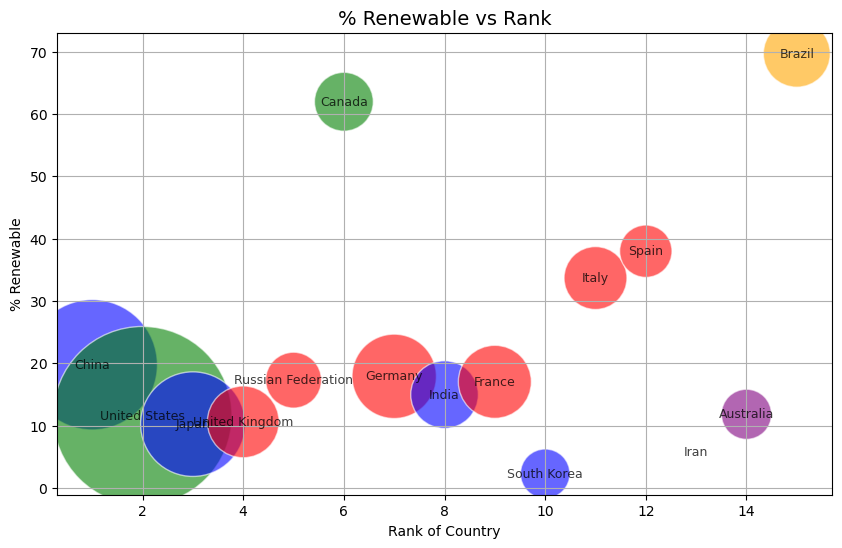

In [505]:
continent_colors = {
    'Asia': 'blue',
    'North America': 'green',
    'Europe': 'red',
    'Australia': 'purple',
    'South America': 'orange'
}

df_for_chart = new_df.reset_index()
first30 = df_for_chart.head(15)

colors = first30['Continent'].map(continent_colors)
colors = colors.fillna('gray')
plt.figure(figsize = (10, 6))

gdp_2015_normalized = first30['2015'] / 1e9  

scatter = plt.scatter(
    first30['Rank'],  
    first30['% Renewable'], 
    s = gdp_2015_normalized,  
    c = colors, 
    alpha = 0.6,
    edgecolors = "w",
)

for i in range(len(first30)):
    plt.text(
        first30['Rank'].iloc[i],  
        first30['% Renewable'].iloc[i],
        first30['Country'].iloc[i], 
        fontsize=9,  
        ha='center', 
        va='center', 
        color='black', 
        alpha=0.75
    )

plt.title('% Renewable vs Rank', fontsize=14)
plt.xlabel('Rank of Country')
plt.ylabel('% Renewable')

plt.grid(True)
plt.show()
